In [1]:

pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


Keyring is skipped due to an exception: 'keyring.backends'


In [2]:
import os
import cv2 as cv


In [1]:
import os
import cv2
import pandas as pd
import numpy as np

def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = os.path.join(folder_path, filename)
        # if img is not None:
        #     img = cv2.resize(img, (227, 227))  # Resize the images to match the input shape of AlexNet
        #     img=np.array(img)
        images.append(img)
        labels.append(label)
    return images, labels

# Define the two folders containing the images and their corresponding labels
folder_path_classA = r"C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW"
folder_path_classB = r"C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE"

# Load images and labels for classA
images_classA, labels_classA = load_images_from_folder(folder_path_classA, label="Raw")

# Load images and labels for classB
images_classB, labels_classB = load_images_from_folder(folder_path_classB, label="Ripe")

# Combine the data from both classes into a single DataFrame
data = {
    "image": images_classA + images_classB,
    "label": labels_classA + labels_classB
}

df = pd.DataFrame(data)

# Shuffle the DataFrame (optional)
df = df.sample(frac=1).reset_index(drop=True)

# Now, the DataFrame 'df' contains the image data and corresponding labels from both folders.
# You can use this DataFrame for further processing or training your model.


In [2]:
df

,image,label
0,C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...,Raw
1,C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...,Raw
2,C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...,Ripe
3,C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...,Raw
4,C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...,Ripe
...,...,...
1299,C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...,Ripe
1300,C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...,Ripe
1301,C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...,Ripe
1302,C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...,Ripe


In [3]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in the DataFrame
df["encoded_label"] = label_encoder.fit_transform(df["label"])

print(df)


                                                  image label  encoded_label
0     C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...   Raw              0
1     C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...   Raw              0
2     C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1
3     C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...   Raw              0
4     C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1
...                                                 ...   ...            ...
1299  C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1
1300  C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1
1301  C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1
1302  C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1
1303  C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1

[1304 rows x 3 columns]


In [4]:
# earlystopping = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0.001,
#     # patience=2,
#     verbose=1,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False,
# )

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model (excluding the top classification layers)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the VGG16 base (optional)
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the VGG16 base
model.add(vgg_base)

# Add custom layers for binary classification
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [7]:
def load_and_preprocess_image(image_path, image_width, image_height):
    image = Image.open(image_path)
    image = image.resize((image_width, image_height))
    image_array = np.array(image) / 255.0
    return image_array

In [8]:
X = np.array([load_and_preprocess_image(str(path), 224,224) for path in df['image']])
y = df['encoded_label'] 

In [9]:

model.fit(X,y, batch_size=100, epochs=15, validation_split=0.2)


Epoch 1/15
11/11 [==============================] - 85s 8s/step - loss: 2.0705 - accuracy: 0.6769 - val_loss: 0.8927 - val_accuracy: 0.7816
Epoch 2/15
11/11 [==============================] - 83s 8s/step - loss: 0.7170 - accuracy: 0.7804 - val_loss: 0.3557 - val_accuracy: 0.8774
Epoch 3/15
11/11 [==============================] - 87s 8s/step - loss: 0.3975 - accuracy: 0.8533 - val_loss: 0.3429 - val_accuracy: 0.8697
Epoch 4/15
11/11 [==============================] - 84s 8s/step - loss: 0.2945 - accuracy: 0.8849 - val_loss: 0.3086 - val_accuracy: 0.8736
Epoch 5/15
11/11 [==============================] - 84s 8s/step - loss: 0.2365 - accuracy: 0.9051 - val_loss: 0.3395 - val_accuracy: 0.8851
Epoch 6/15
11/11 [==============================] - 84s 8s/step - loss: 0.2116 - accuracy: 0.9118 - val_loss: 0.2889 - val_accuracy: 0.8736
Epoch 7/15
11/11 [==============================] - 86s 8s/step - loss: 0.1870 - accuracy: 0.9262 - val_loss: 0.2846 - val_accuracy: 0.8774
Epoch 8/15
11/11 [==

In [10]:
model.save('vggORG_model1.h5')

In [11]:
import os

In [12]:
import os
import cv2
import pandas as pd
import numpy as np

def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = os.path.join(folder_path, filename)
        # if img is not None:
        #     img = cv2.resize(img, (227, 227))  # Resize the images to match the input shape of AlexNet
        #     img=np.array(img)
        images.append(img)
        labels.append(label)
    return images, labels

# Define the two folders containing the images and their corresponding labels
folder_path_classA = r"C:\Users\GMRIT\Desktop\pineapple577\results\DATA\RAW"
folder_path_classB = r"C:\Users\GMRIT\Desktop\pineapple577\results\DATA\RIPE"

# Load images and labels for classA
images_classA, labels_classA = load_images_from_folder(folder_path_classA, label="Raw")

# Load images and labels for classB
images_classB, labels_classB = load_images_from_folder(folder_path_classB, label="Ripe")

# Combine the data from both classes into a single DataFrame
data = {
    "image": images_classA + images_classB,
    "label": labels_classA + labels_classB
}

df = pd.DataFrame(data)

# Shuffle the DataFrame (optional)
df = df.sample(frac=1).reset_index(drop=True)

# Now, the DataFrame 'df' contains the image data and corresponding labels from both folders.
# You can use this DataFrame for further processing or training your model.


In [13]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in the DataFrame
df["encoded_label"] = label_encoder.fit_transform(df["label"])

print(df)


                                                 image label  encoded_label
0    C:\Users\GMRIT\Desktop\pineapple577\results\DA...   Raw              0
1    C:\Users\GMRIT\Desktop\pineapple577\results\DA...   Raw              0
2    C:\Users\GMRIT\Desktop\pineapple577\results\DA...  Ripe              1
3    C:\Users\GMRIT\Desktop\pineapple577\results\DA...  Ripe              1
4    C:\Users\GMRIT\Desktop\pineapple577\results\DA...  Ripe              1
..                                                 ...   ...            ...
140  C:\Users\GMRIT\Desktop\pineapple577\results\DA...   Raw              0
141  C:\Users\GMRIT\Desktop\pineapple577\results\DA...   Raw              0
142  C:\Users\GMRIT\Desktop\pineapple577\results\DA...  Ripe              1
143  C:\Users\GMRIT\Desktop\pineapple577\results\DA...  Ripe              1
144  C:\Users\GMRIT\Desktop\pineapple577\results\DA...  Ripe              1

[145 rows x 3 columns]


In [14]:
Xt = np.array([load_and_preprocess_image(str(path), 224,224) for path in df['image']])
yt = df['encoded_label'] 

In [15]:
from tensorflow.keras.models import load_model

# Load the model from the H5 file
loaded_model = load_model('vggORG_model1.h5')

# Now, you can use the loaded_model to make predictions on new data
# For example:
import numpy as np

# Assuming you have new data stored in the 'new_data' variable
predictions = loaded_model.predict(Xt)

# 'predictions' will contain the model's output for the new data
# You can now use 'predictions' for further processing or analysis


5/5 [==============================] - 9s 2s/step


In [17]:


print(predictions)
predictions.size

[[2.09958047e-01]
 [4.03484106e-01]
 [9.86290038e-01]
 [9.58417892e-01]
 [7.23986924e-01]
 [9.78009775e-03]
 [8.28532219e-01]
 [8.13259959e-01]
 [1.63700283e-01]
 [2.12935265e-02]
 [9.56498623e-01]
 [9.04024601e-01]
 [6.74709260e-01]
 [9.81558502e-01]
 [8.52522671e-01]
 [6.56157553e-01]
 [2.84180433e-01]
 [8.78275037e-01]
 [8.01562965e-01]
 [9.93569717e-02]
 [9.92140710e-01]
 [7.29488254e-01]
 [7.65578926e-01]
 [1.56199802e-02]
 [6.30589485e-01]
 [8.66713762e-01]
 [6.65246665e-01]
 [9.35274959e-01]
 [7.55162328e-04]
 [9.10609901e-01]
 [1.94756500e-02]
 [5.71129732e-02]
 [6.88260019e-01]
 [9.02546197e-02]
 [9.88518000e-01]
 [6.94666326e-01]
 [9.02037621e-01]
 [9.12072957e-01]
 [3.82622451e-01]
 [3.80894303e-01]
 [6.34693861e-01]
 [1.28090410e-02]
 [7.68764138e-01]
 [5.28628044e-02]
 [7.64839888e-01]
 [9.51520145e-01]
 [5.33026585e-04]
 [1.70761589e-02]
 [8.99857998e-01]
 [9.77314353e-01]
 [9.87700403e-01]
 [6.04871511e-01]
 [9.75245833e-01]
 [1.55527350e-02]
 [4.42863435e-01]
 [8.893716

145

In [18]:
from sklearn.metrics import classification_report

In [27]:
# Set the threshold value
threshold = 0.2

# Apply thresholding to convert to binary targets
pred = (predictions > threshold).astype(int)

print("Continuous Targets:", predictions)
print("Binary Targets:", pred)


Continuous Targets: [[2.09958047e-01]
 [4.03484106e-01]
 [9.86290038e-01]
 [9.58417892e-01]
 [7.23986924e-01]
 [9.78009775e-03]
 [8.28532219e-01]
 [8.13259959e-01]
 [1.63700283e-01]
 [2.12935265e-02]
 [9.56498623e-01]
 [9.04024601e-01]
 [6.74709260e-01]
 [9.81558502e-01]
 [8.52522671e-01]
 [6.56157553e-01]
 [2.84180433e-01]
 [8.78275037e-01]
 [8.01562965e-01]
 [9.93569717e-02]
 [9.92140710e-01]
 [7.29488254e-01]
 [7.65578926e-01]
 [1.56199802e-02]
 [6.30589485e-01]
 [8.66713762e-01]
 [6.65246665e-01]
 [9.35274959e-01]
 [7.55162328e-04]
 [9.10609901e-01]
 [1.94756500e-02]
 [5.71129732e-02]
 [6.88260019e-01]
 [9.02546197e-02]
 [9.88518000e-01]
 [6.94666326e-01]
 [9.02037621e-01]
 [9.12072957e-01]
 [3.82622451e-01]
 [3.80894303e-01]
 [6.34693861e-01]
 [1.28090410e-02]
 [7.68764138e-01]
 [5.28628044e-02]
 [7.64839888e-01]
 [9.51520145e-01]
 [5.33026585e-04]
 [1.70761589e-02]
 [8.99857998e-01]
 [9.77314353e-01]
 [9.87700403e-01]
 [6.04871511e-01]
 [9.75245833e-01]
 [1.55527350e-02]
 [4.4286

In [28]:
# Create a classification report
report = classification_report(yt, pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        51
           1       0.84      0.93      0.88        94

    accuracy                           0.84       145
   macro avg       0.84      0.81      0.82       145
weighted avg       0.84      0.84      0.84       145



In [29]:
predict = loaded_model.predict(np.array([load_and_preprocess_image(str(r"C:\Users\GMRIT\Desktop\pineapple577\ripe.jpg"), 227,227)]))


1/1 [==============================] - 0s 201ms/step


In [30]:
predict

array([[0.5355567]], dtype=float32)

In [31]:
pip install visualkeras


Note: you may need to restart the kernel to use updated packages.


Keyring is skipped due to an exception: 'keyring.backends'


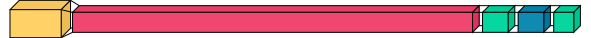

In [32]:
import visualkeras
visualkeras.layered_view(model)

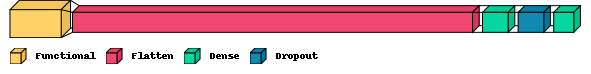

In [33]:
visualkeras.layered_view(model, legend=True) # without custom font

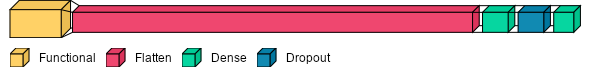

In [34]:
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font) # selected font

In [35]:
# Save the model summary to a text file
with open('VGGORG_model_summary.txt', 'w') as f:
    loaded_model.summary(print_fn=lambda x: f.write(x + '\n'))

print("Model summary saved to 'inception_model_summary.txt'.")

Model summary saved to 'inception_model_summary.txt'.
